# Assignment 2: Due Tuesday 9/17

## 2D Projectile Motion with Quadratic Drag 

Quadratic drag term is given by $\vec{f}_{drag} = -cv\vec{v}$. This leads to equations of motion in the horizontal ($x$) and vertical ($y$) directions given by 

* $m v_{x}' = -\left(c\sqrt{v^2_x +v^2_y}\right)v_x$

* $m v_{y}' = - mg - \left(c\sqrt{v^2x + v^2_y}) \right)v_y$

* $x' = v_x$

* $y' = v_y$

,where $'$ is a time derivative.

You can read more about drag forces here: https://openstax.org/books/university-physics-volume-1/pages/6-4-drag-force-and-terminal-speed

## Problem

To get an accurate trajectory for a projectile one must often take account of several complications. For example, if a projectile goes very high then we have to allow for the reduction in air resistance as atmospheric density decreases. To illustrate this, consider an iron cannonball (diameter, $D = 15\;cm$, density $\rho = 7.8\;g/cm^3$) that is fired with initial velocity $300 m/s$ at 50 degrees above the horizontal. The drag force is approximately quadratic, but since the drag is proportional to the atmospheric density and the density falls off exponentially with height, the drag force is $f = c(y) v^2$ where $c(y) = \gamma D^2 exp(-y/\lambda)$ with $\gamma$ given as $0.25\;N\cdot s^2/m^4$ and $\lambda = 10,000\;m$. 

# Part a)

Ignoring air resistance completely, write down the equations of motion for the cannonball (use the markup feature in Jupyter notbook and latex (https://en.wikibooks.org/wiki/LaTeX/Mathematics)). Your answer should depend on only $v_x, v_y,$ and $g$ 

Equations with no air resistance ($c = 0$):

* $v_x' = $

* $x' = $

* $v_y' = $

* $y' = $

Code the equations into a function 

In [7]:
import numpy as np

#define projectile motion function in vaccum
def proj_vac(t, state, g):

    x, y, vx, vy = state
    
    #x-components
    dvxdt = 0
    dxdt = vx 

    #y-components
    dvydt = -g     
    dydt = vy
    
    return [dxdt, dydt, dvxdt, dvydt]



Using Scipy (*RK4(5)* method) solve numerically $x(t)$ and $y(t)$ for $0 \le t \le 50\;s$

In [10]:
#code
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

g = 9.81  # Gravitational acceleration in m/s^2
v0 = 300  # Initial velocity in m/s
theta = 50 * np.pi / 180  # Launch angle in radians

v_x0 = v0 * np.cos(theta)  # Initial horizontal velocity
v_y0 = v0 * np.sin(theta)  # Initial vertical velocity
x0 = 0  # Initial horizontal position
y0 = 0  # Initial vertical position

t = (0, 50)  # From 0 to 50 seconds

initial_conditions = [x0, y0, v_x0, v_y0]

sol = solve_ivp(proj_vac, t, initial_conditions, args=(g,), method='RK45', max_step=0.1)

time_points = sol.t  # Time points
x = sol.y[0]  # x(t) positions
y = sol.y[1]  # y(t) positions

print("x positions: ",x)
print("y positions: ",y)

x-positions:  [0.00000000e+00 9.09034621e-04 9.99938083e-03 1.00902843e-01
 1.00993746e+00 1.01002837e+01 2.93839120e+01 4.86675403e+01
 6.79511685e+01 8.72347968e+01 1.06518425e+02 1.25802053e+02
 1.45085682e+02 1.64369310e+02 1.83652938e+02 2.02936567e+02
 2.22220195e+02 2.41503823e+02 2.60787451e+02 2.80071080e+02
 2.99354708e+02 3.18638336e+02 3.37921965e+02 3.57205593e+02
 3.76489221e+02 3.95772849e+02 4.15056478e+02 4.34340106e+02
 4.53623734e+02 4.72907363e+02 4.92190991e+02 5.11474619e+02
 5.30758248e+02 5.50041876e+02 5.69325504e+02 5.88609132e+02
 6.07892761e+02 6.27176389e+02 6.46460017e+02 6.65743646e+02
 6.85027274e+02 7.04310902e+02 7.23594530e+02 7.42878159e+02
 7.62161787e+02 7.81445415e+02 8.00729044e+02 8.20012672e+02
 8.39296300e+02 8.58579928e+02 8.77863557e+02 8.97147185e+02
 9.16430813e+02 9.35714442e+02 9.54998070e+02 9.74281698e+02
 9.93565326e+02 1.01284895e+03 1.03213258e+03 1.05141621e+03
 1.07069984e+03 1.08998347e+03 1.10926710e+03 1.12855072e+03
 1.1478343

Plot the ball's trajectory (vertical vs. horizontal positions) and find it's horizontal range. At what time does the ball hit the ground?

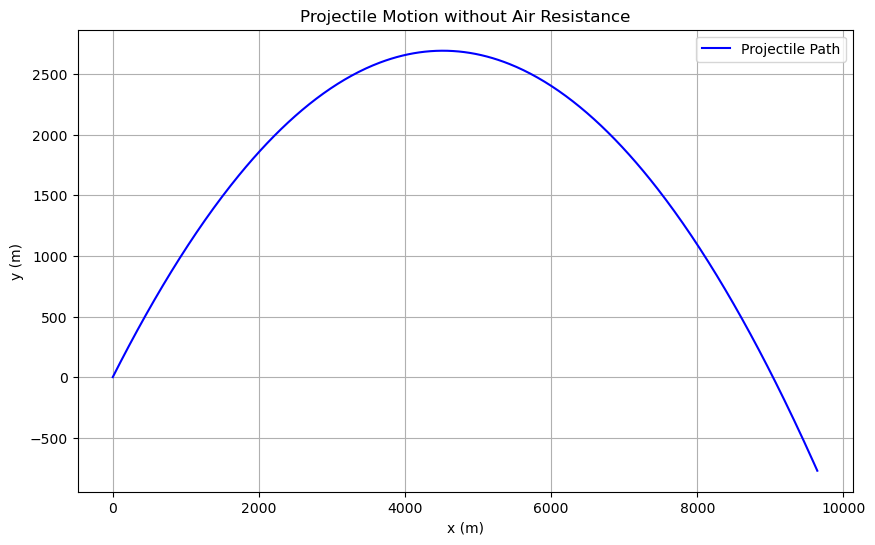

The ball hits the ground at time t = 46.95 seconds.
The horizontal range is 9054.12 meters.


In [12]:
#codes

plt.figure(figsize=(10, 6))
plt.plot(x, y, label="Projectile Path", color="b")
plt.title("Projectile Motion without Air Resistance")
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.grid(True)
plt.legend()
plt.show()

# Finding the time when the ball hits the ground (y=0)
for i in range(len(y)):
    if y[i] < 0:
        t_hit_ground = np.interp(0, [y[i-1], y[i]], [time_points[i-1], time_points[i]])
        x_hit_ground = np.interp(0, [y[i-1], y[i]], [x[i-1], x[i]])
        break

# Display the horizontal range and time when it hits the ground
print(f"The ball hits the ground at time t = {t_hit_ground:.2f} seconds.")
print(f"The horizontal range is {x_hit_ground:.2f} meters.")


# Part b)

Write your own Runge-Kutta order 4 function and use it to solve Part a) [Meaning do not use Scipy for this part].

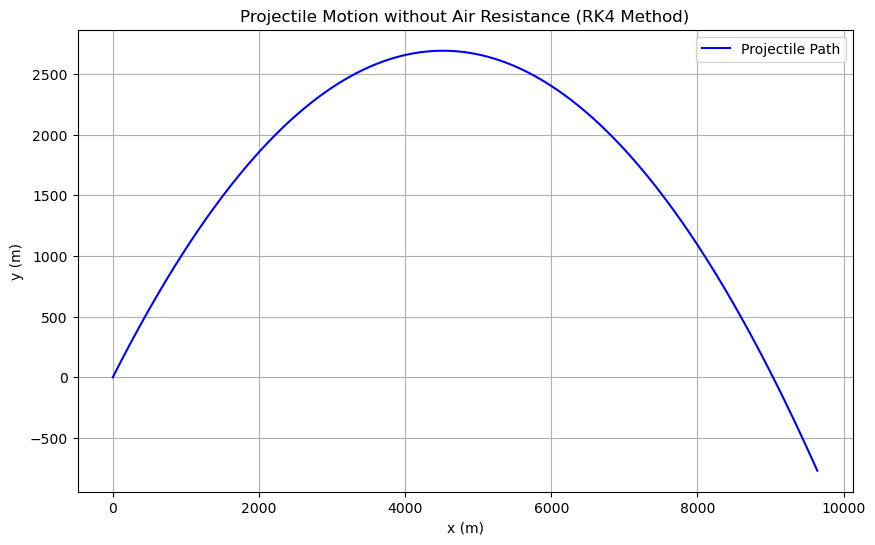

The ball hits the ground at time t = 46.86 seconds.
The horizontal range is 9036.31 meters.


In [28]:
#codes
# Define the equations of motion for projectile motion without air resistance
def proj_vacuum(state, g):

    x, y, vx, vy = state
    dxdt = vx      # Horizontal velocity
    dydt = vy      # Vertical velocity
    dvxdt = 0      # No acceleration in the x-direction
    dvydt = -g     # Acceleration due to gravity in the y-direction
    
    return np.array([dxdt, dydt, dvxdt, dvydt])

# Define the custom RK4 function
def rk4_step(f, state, h, g):

    k1 = h * f(state, g)
    k2 = h * f(state + 0.5 * k1, g)
    k3 = h * f(state + 0.5 * k2, g)
    k4 = h * f(state + k3, g)
    
    state_new = state + (1/6) * (k1 + 2*k2 + 2*k3 + k4)
    
    return state_new

# Function to perform RK4 over multiple time steps
def rk4_solver(f, initial_conditions, t_span, h, g):

    t_points = np.arange(t_span[0], t_span[1], h)
    num_steps = len(t_points)
    
    # Initialize arrays to store results
    state = np.zeros((num_steps, len(initial_conditions)))
    state[0] = initial_conditions
    
    for i in range(1, num_steps):
        state[i] = rk4_step(f, state[i-1], h, g)
    
    x_points = state[:, 0]  # x positions
    y_points = state[:, 1]  # y positions
    
    return t_points, x_points, y_points



# Constants
g = 9.81  # Gravitational acceleration in m/s^2
v0 = 300  # Initial velocity in m/s
theta = 50 * np.pi / 180  # Launch angle in radians

# Initial conditions
v_x0 = v0 * np.cos(theta)  # Initial horizontal velocity
v_y0 = v0 * np.sin(theta)  # Initial vertical velocity
x0 = 0  # Initial horizontal position
y0 = 0  # Initial vertical position

# Time span and step size
t = (0, 50)  # From 0 to 50 seconds
h = 0.01  # Time step size

# Initial state vector [x0, y0, vx0, vy0]
initial_conditions = [x0, y0, v_x0, v_y0]

# Solving the system using the custom RK4 solver
t_points, x_points, y_points = rk4_solver(proj_vacuum, initial_conditions, t, h, g)




# Plot the trajectory
plt.figure(figsize=(10, 6))
plt.plot(x_points, y_points, label="Projectile Path", color="b")
plt.title("Projectile Motion without Air Resistance (RK4 Method)")
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.grid(True)
plt.legend()
plt.show()




# Find when the projectile hits the ground (y = 0)
for i in range(len(y_points)):
    if y_points[i] < 0:
        t_hit_ground = np.interp(0, [y_points[i-1], y_points[i]], [t_points[i-1], t_points[i]])
        x_hit_ground = np.interp(0, [y_points[i-1], y_points[i]], [x_points[i-1], x_points[i]])
        break


# Display the horizontal range and time when the ball hits the ground
print(f"The ball hits the ground at time t = {t_hit_ground:.2f} seconds.")
print(f"The horizontal range is {x_hit_ground:.2f} meters.")

How does your Runge-Kutta 4th order evaluation compare to Scipy's *RK4(5)* method?

# Part c)

Now include air resistance, but ignore the variation of atmospheric pressure [that is  treat $c(y)$ as a constant  that does not change with position, where $c = \gamma D^2$].

Write down the equations of motion (use the markup feature in Jupyter notbook and latex). Your answers should depend only on $c, m, v, v_x, v_y,$ and $g$.

Equations with no air resistance ($c = const$):

* $v_x' = $

* $x' = $

* $v_y' = $

* $y' = $

Code the equations into a function

In [39]:
#code# Define the equations of motion with air resistance
def proj_with_drag(t, state, c, m, g):

    x, y, vx, vy = state
    v = np.sqrt(vx**2 + vy**2)
    
    # Equations of motion
    dvxdt = - (c / m) * v * vx
    dxdt = vx
    dvydt = -g - (c / m) * v * vy
    dydt = vy
    
    return[dxdt, dydt, dvxdt, dvydt]

Use Scipy (*RK4(5)* method) to solve numerically $x(t)$ and $y(t)$ for $0\le t \le 35\;s$

In [42]:
# Constants
g = 9.81  # Gravitational acceleration in m/s^2
v0 = 300  # Initial velocity in m/s
theta = 50 * np.pi / 180  # Launch angle in radians
D = 0.15  # Diameter of the cannonball in meters
p = 17.8  # Density of iron in g/cm^3 (convert to kg/m^3)
m = 4/3 * np.pi * (D/2)**3 * (p * 1e3)  # Mass of the cannonball in kg
c = 0.25 * (D**2)  # Drag coefficient

# Initial conditions
v_x0 = v0 * np.cos(theta)  # Initial horizontal velocity
v_y0 = v0 * np.sin(theta)  # Initial vertical velocity
x0 = 0  # Initial horizontal position
y0 = 0  # Initial vertical position

# Time span and initial conditions
t_span = (0, 35)  # From 0 to 35 seconds
initial_conditions = [x0, y0, v_x0, v_y0]

# Solve the system using solve_ivp with RK45 method
sol = solve_ivp(
    proj_with_drag, 
    t_span, 
    initial_conditions, 
    args=(c, m, g), 
    method='RK45', 
    t_eval=np.linspace(0, 35, 1000)
)

# Extract results
t_points = sol.t
x_points = sol.y[0]
y_points = sol.y[1]

print("x positions: ", x_points)
print("y positions: ", y_points)

x positions:  [   0.            6.74968658   13.48673354   20.21119921   26.9231415
   33.62261796   40.30968577   46.98440177   53.64682242   60.29700385
   66.93500185   73.56087181   80.1746688    86.77644753   93.36626236
   99.94416733  106.5102405   113.0645528   119.60715371  126.13809255
  132.65741843  139.16518025  145.66142674  152.14620642  158.61956763
  165.08155849  171.53222696  177.97162078  184.3997875   190.81677448
  197.22262889  203.61739769  210.00112766  216.37386538  222.73565724
  229.08654943  235.42658794  241.75581858  248.07428696  254.3820385
  260.6791184   266.9655717   273.24144323  279.50677763  285.76161932
  292.00601257  298.24000143  304.46362975  310.6769412   316.87997925
  323.07278717  329.25540804  335.42788475  341.59026     347.74257627
  353.88487587  360.01720092  366.13959331  372.25209479  378.35474685
  384.44759085  390.53066792  396.60401898  402.66768481  408.72170594
  414.76612273  420.80097536  426.82630378  432.84214777  438.848

Plot the ball's trajecory and find it's horizontal range. At what time does the ball hit the ground?

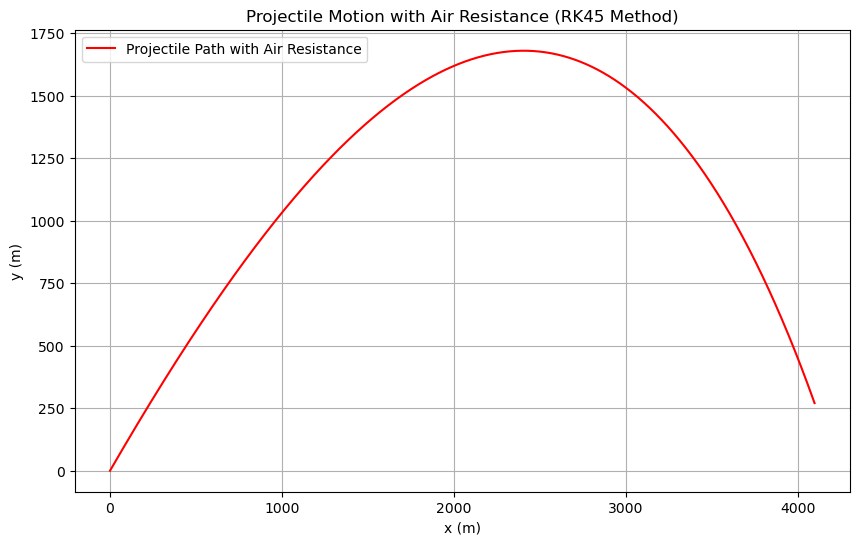

The ball hits the ground at time t = 46.86 seconds.
The horizontal range is 9036.31 meters.


In [44]:
#codes
# Plot the trajectory
plt.figure(figsize=(10, 6))
plt.plot(x_points, y_points, label="Projectile Path with Air Resistance", color="r")
plt.title("Projectile Motion with Air Resistance (RK45 Method)")
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.grid(True)
plt.legend()
plt.show()

# Find when the projectile hits the ground (y = 0)
for i in range(len(y_points)):
    if y_points[i] < 0:
        t_hit_ground = np.interp(0, [y_points[i-1], y_points[i]], [t_points[i-1], t_points[i]])
        x_hit_ground = np.interp(0, [y_points[i-1], y_points[i]], [x_points[i-1], x_points[i]])
        break

# Display the horizontal range and time when the ball hits the ground
print(f"The ball hits the ground at time t = {t_hit_ground:.2f} seconds.")
print(f"The horizontal range is {x_hit_ground:.2f} meters.")

# Part d)

Now include the drag term with the atmospheric variation included [meaning $c(y) = \gamma D^2exp(-y/\lambda)$]

Write down the equations of motion (use the markup feature in Jupyter notbook and latex). For this part write out explicitly what $c$ is in your equations, e.g. $a*c = a* \gamma D^2exp(-y/\lambda)$. Your equations should depend only on $\gamma, \lambda, y, D, v, v_x, v_y, m,$ and $g$.

Equations with no air resistance ($c = \gamma D^2exp(-y/\lambda)$):

* $v_x' = $

* $x' = $

* $v_y' = $

* $y' = $

Code the equations into a function

In [64]:
#code
def proj_with_atmospheric_drag(t, state, gamma, D, lambda_, m, g):
    x, y, vx, vy = state
    v = np.sqrt(vx**2 + vy**2)
    c_y = gamma * (D**2) * np.exp(-y / lambda_)
    
    # Equations of motion with varying drag
    dvxdt = - (c_y / m) * vx
    dxdt = vx
    dvydt = -g - (c_y / m) * vy
    dydt = vy
    
    return [dxdt, dydt, dvxdt, dvydt]

Use Scipy (*RK4(5)* method) to solve numerically $x(t)$ and $y(t)$ for $0\le t \le 35\;s$

In [67]:
# Constants
g = 9.81  # Gravitational acceleration in m/s^2
v0 = 300  # Initial velocity in m/s
theta = 50 * np.pi / 180  # Launch angle in radians
D = 0.15  # Diameter of the cannonball in meters
p = 17.8  # Density of iron in g/cm^3 (convert to kg/m^3)
m = 4/3 * np.pi * (D/2)**3 * (p * 1e3)  # Mass of the cannonball in kg
gamma = 0.25  # Drag coefficient constant
lambda_ = 10000  # Scale height for atmospheric pressure


# Initial conditions
v_x0 = v0 * np.cos(theta)  # Initial horizontal velocity
v_y0 = v0 * np.sin(theta)  # Initial vertical velocity
x0 = 0  # Initial horizontal position
y0 = 0  # Initial vertical position


# Time span and initial conditions
t_span = (0, 35)  # From 0 to 35 seconds
initial_conditions = [x0, y0, v_x0, v_y0]


# Solve the system using solve_ivp with RK45 method
sol = solve_ivp(
    proj_with_atmospheric_drag, 
    t_span, 
    initial_conditions, 
    args=(gamma, D, lambda_, m, g), 
    method='RK45', 
    t_eval=np.linspace(0, 35, 1000)
)

# Extract results
t_points = sol.t
x_points = sol.y[0]
y_points = sol.y[1]

print("x positions: ", x_points)
print("y positions: ", y_points)

x positions:  [   0.            6.75600477   13.51196725   20.26788746   27.02376545
   33.77960126   40.5353949    47.29114642   54.04685585   60.80252323
   67.55814859   74.31373195   81.06927337   87.82477286   94.58023046
  101.33564621  108.09102014  114.84635228  121.60164267  128.35689134
  135.11209832  141.86726364  148.62238735  155.37746946  162.13251001
  168.88750904  175.64246658  182.39738266  189.1522573   195.90709055
  202.66188244  209.416633    216.17134225  222.92601023  229.68063698
  236.43522252  243.18976689  249.94427012  256.69873224  263.45315327
  270.20753326  276.96187224  283.71617022  290.47042726  297.22464337
  303.97881858  310.73295294  317.48704647  324.2410992   330.99511115
  337.74908237  344.50301289  351.25690272  358.01075191  364.76456049
  371.51832847  378.27205591  385.02574281  391.77938922  398.53299517
  405.28656068  412.04008579  418.79357052  425.5470149   432.30041897
  439.05378275  445.80710628  452.56038958  459.31363268  466.0

Plot the ball's trajectory and find it's horizontal range. At what time does it hit the ground?

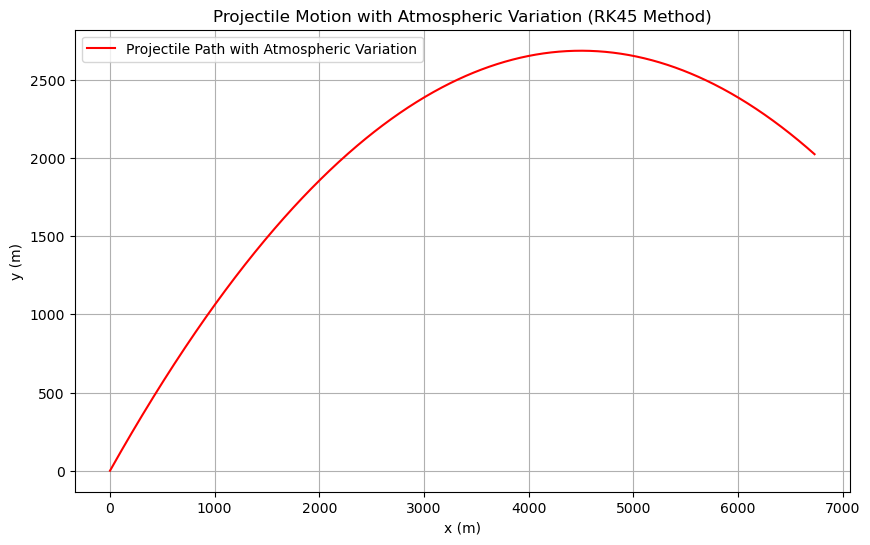

The ball hits the ground at time t = 46.86 seconds.
The horizontal range is 9036.31 meters.


In [70]:
# Plot the trajectory
plt.figure(figsize=(10, 6))
plt.plot(x_points, y_points, label="Projectile Path with Atmospheric Variation", color="r")
plt.title("Projectile Motion with Atmospheric Variation (RK45 Method)")
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.grid(True)
plt.legend()
plt.show()

# Find when the projectile hits the ground (y = 0)
for i in range(len(y_points)):
    if y_points[i] < 0:
        t_hit_ground = np.interp(0, [y_points[i-1], y_points[i]], [t_points[i-1], t_points[i]])
        x_hit_ground = np.interp(0, [y_points[i-1], y_points[i]], [x_points[i-1], x_points[i]])
        break

# Display the horizontal range and time when the ball hits the ground
print(f"The ball hits the ground at time t = {t_hit_ground:.2f} seconds.")
print(f"The horizontal range is {x_hit_ground:.2f} meters.")

# Part e)

Plot the trajectories from parts a), c), and d) on the same plot.

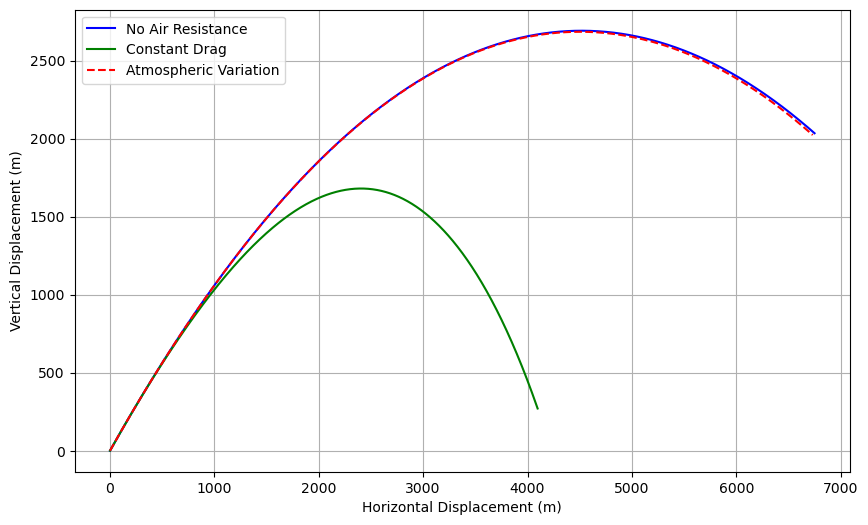

In [62]:
#codes
sol_vac = solve_ivp(
    proj_vac, 
    t_span, 
    initial_conditions, 
    args=(g,), 
    method='RK45', 
    t_eval=np.linspace(0, 35, 1000)
)
    
x_vac = sol_vac.y[0]
y_vac = sol_vac.y[1]

sol_drag = solve_ivp(
    proj_with_drag, 
    t_span, 
    initial_conditions, 
    args=(c, m, g), 
    method='RK45', 
    t_eval=np.linspace(0, 35, 1000)
)
x_drag = sol_drag.y[0]
y_drag = sol_drag.y[1]


sol_atmo = solve_ivp(
    proj_with_atmospheric_drag, 
    t_span, 
    initial_conditions, 
    args=(gamma, D, lambda_, m, g), 
    method='RK45', 
    t_eval=np.linspace(0, 35, 1000)
)
x_atmo = sol_atmo.y[0]
y_atmo = sol_atmo.y[1]

plt.figure(figsize=(10, 6))
plt.plot(x_vac, y_vac, label="No Air Resistance", color="b")
plt.plot(x_drag, y_drag, label="Constant Drag", color="g")
plt.plot(x_atmo, y_atmo, label="Atmospheric Variation", color="r", linestyle='--')
plt.xlabel("Horizontal Displacement (m)")
plt.ylabel("Vertical Displacement (m)")
plt.grid(True)
plt.legend()
plt.show()

Your results should look like the plot below.

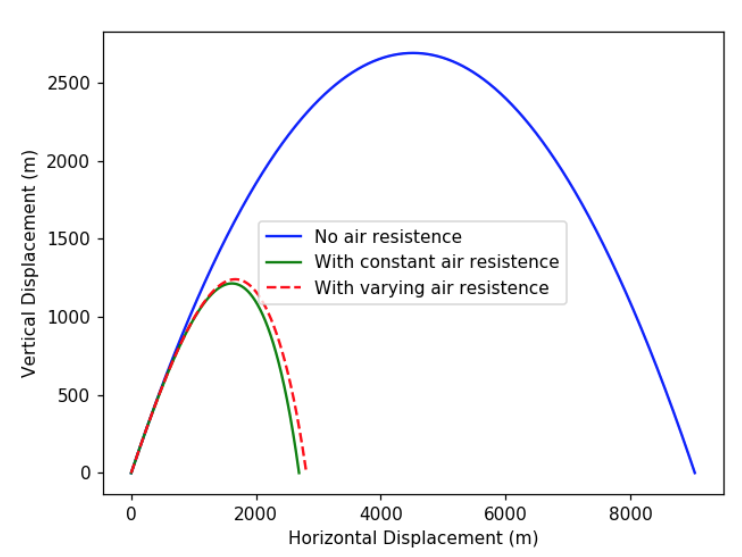

**What impacts the motion more: turning on air resistance (i.e with $c(0)$) or turning on the variation with atmosphere (i.e. $c(y)$) ?**

In [72]:
Air resistance has a more noticable impact on projectile motion

SyntaxError: invalid syntax (2951103931.py, line 1)